#### Análise exploratória inicial do dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Leia o arquivo csv
df_train = pd.read_csv('train.csv', index_col=[0])
df_test = pd.read_csv('test.csv', index_col=[0])
# Informações sobre o dataset
print(df_train.info())
print("\n")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          217 non-null    float64
 1   pelvic_tilt               217 non-null    float64
 2   lumbar_lordosis_angle     217 non-null    float64
 3   sacral_slope              217 non-null    float64
 4   pelvic_radius             217 non-null    float64
 5   degree_spondylolisthesis  217 non-null    float64
 6   class                     217 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 217 to 309
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          93 non-null     float64
 1   pelvic_tilt               93 non-null     float64
 2   lumbar_lordosis_angle

In [ ]:
# Mostrar as primeiras linhas
df_train.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
1,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
2,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
3,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
4,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia


In [ ]:
## Pré-processamento dos dados

# Verificar a existência de dados ausentes: df.isnull().sum()
print("Treino:")
print(df_train.isnull().sum())
print("\n")
print("Teste:")
print(df_test.isnull().sum())

Treino:
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


Teste:
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
dtype: int64


In [ ]:
## Normalização dos dados

# Verificar a existência de outliers nos dados através do desvio padrão
std_train = df_train.drop('class', axis=1).std()
print("\nDesvio padrão Dataset Treino:")
print(std_train)

# Printar numero de outliers por coluna (Outlier = 3*std)
print("\nNúmero de outliers por coluna:")
print((df_train.drop('class', axis=1) > 3*std_train).sum())

print("\nDescribe:")
print(df_train.describe())


Desvio padrão Dataset Treino:
pelvic_incidence            18.045677
pelvic_tilt                 10.786425
lumbar_lordosis_angle       19.226267
sacral_slope                13.631236
pelvic_radius               13.920744
degree_spondylolisthesis    40.965137
dtype: float64

Número de outliers por coluna:
pelvic_incidence            122
pelvic_tilt                  24
lumbar_lordosis_angle        82
sacral_slope                120
pelvic_radius               217
degree_spondylolisthesis      3
dtype: int64

Describe:
       pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        217.000000   217.000000             217.000000    217.000000   
mean          60.458343    17.541355              52.660081     42.916988   
std           18.045677    10.786425              19.226267     13.631236   
min           26.147921    -6.554948              14.000000     13.516568   
25%           46.236399     9.976664              36.329137     33.366366   
50%           57

<Axes: >

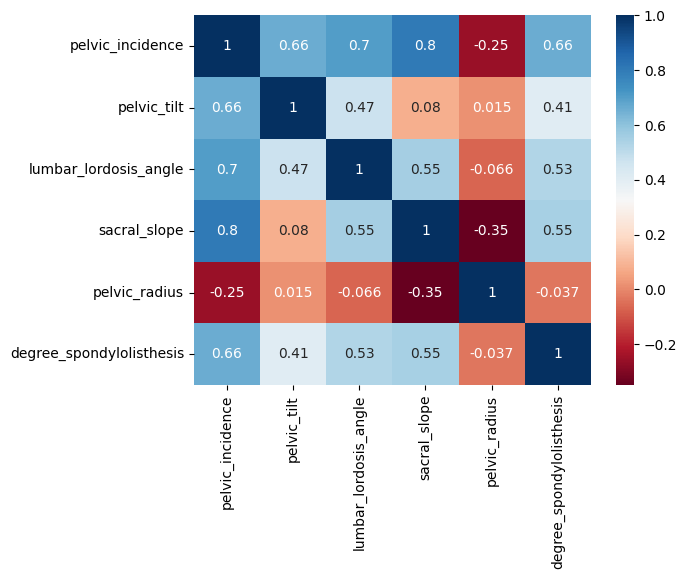

In [3]:
# Verificação de correlação entre as variáveis

df_variaveis = df_train.drop(columns=['class'])
df_class = df_train['class']

# Plotar mapa de calor para verificar a correlação entre as variáveis.
sns.heatmap(df_variaveis.corr(), annot=True, cmap='RdBu')

c:\Users\Andre_Rodrigues\Documents\PUCRS\Machine Learning\Competicao_01\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre_Rodrigues\Documents\PUCRS\Machine Learning\Competicao_01\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre_Rodrigues\Documents\PUCRS\Machine Learning\Competicao_01\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andre_Rodrigues\Documents\PUCRS\Machine Learning\Competicao_01\env\Lib

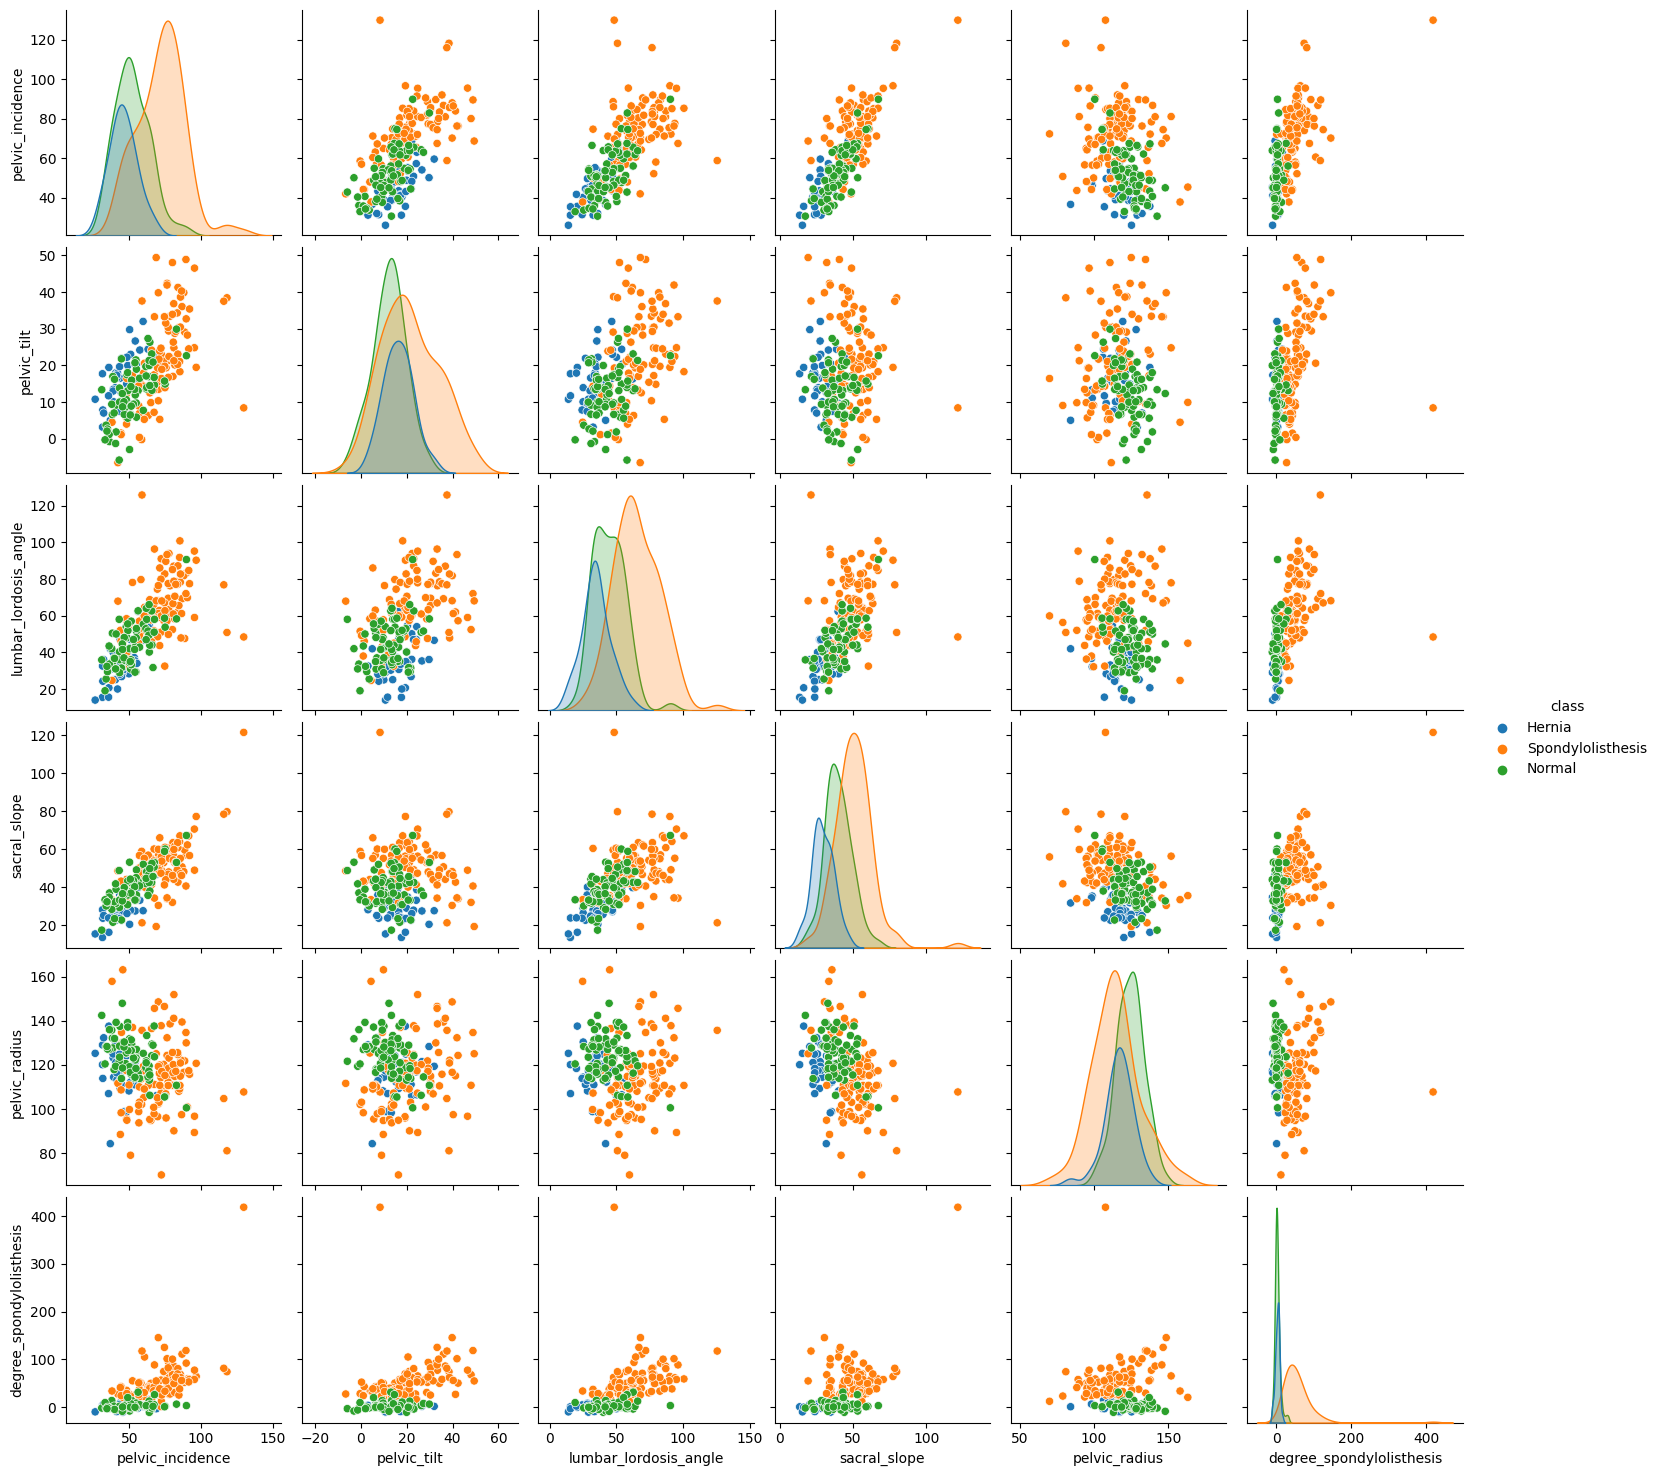

In [4]:
# Plotar grafico de dispersão, entre o conjunto de características (df_variaveis) e o conjunto de classes (df_class)
sns.pairplot(data=df_variaveis.join(df_class), hue='class')
plt.show()

In [ ]:
## Análise exploratória dos dados

# Verificar os tipos de classes para classificação
print("\nClasses para classificação:")
print(df_train['class'].unique())


Classes para classificação:
['Hernia' 'Spondylolisthesis' 'Normal']


#### Separação dos datasets de Treino e Teste

In [ ]:
## Preparação dos dados de Treino e Teste

# Separar os dados de treino em:
# X -> Conjunto de características/atributos
X = df_train.drop(columns=['class'])
# y -> Conjunto de classes/rótulos/Classificação
y = df_train['class']

In [ ]:
'''
    X_train:  O conjunto de características de treinamento.
    X_test:   O conjunto de características de teste. São os dados que serão usados para fazer a predição a fim de avaliar a acurácia do modelo.
    y_train:  O vetor de rótulos de treinamento.
    y_test:   O vetor de rótulos de teste. É o gabarito que será usado para avaliar a acurácia do modelo.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Verificar se o dataset está balanceado entre as classes disponíveis para evitar viés
print("Quantidade nominal de amostras por classe:")
print(y_train.value_counts())
print("\n")
# Proporção de amostras por classe em %
print("Quantidade percentual de amostras por classe:")
print(y_train.value_counts(normalize=True))

Quantidade nominal de amostras por classe:
class
Spondylolisthesis    79
Normal               52
Hernia               31
Name: count, dtype: int64


Quantidade percentual de amostras por classe:
class
Spondylolisthesis    0.487654
Normal               0.320988
Hernia               0.191358
Name: proportion, dtype: float64


O dataset de treino está desbalanceado. Iremos gerar modelos com o dataset de treino nos seguintes estados:
- Desbalanceado
- Balanceado (Undersampling)
- Balanceado (Oversampling)

#### Modelos com dataset de treino desbalanceado

In [ ]:
# Pipeline para o classificador Naive Bayes (GaussianNB)
nb_model_normal = GaussianNB()             # Intancia do modelo Naive Bayes
nb_model_normal.fit(X_train, y_train)      # Treinamento do modelo com os dados de treino
nb_pred_normal = nb_model_normal.predict(X_test)  # Predição do modelo com os dados de teste

# Avaliação do modelo Naive Bayes (accuracy_score, f1_score, precision_score, recall_score)
nb_accuracy = accuracy_score(y_test, nb_pred_normal)
nb_f1 = f1_score(y_test, nb_pred_normal, average='macro')
nb_precision = precision_score(y_test, nb_pred_normal, average='macro')
nb_confusion_matrix = confusion_matrix(y_test, nb_pred_normal)
nb_recall = recall_score(y_test, nb_pred_normal, average='macro')

print("==== Naive Bayes ====")
print("Acurácia: ", nb_accuracy)
print("F1-Score: ", nb_f1)
print("Precisão: ", nb_precision)
print("Confusion Matrix:")
print(nb_confusion_matrix)
print("Recall: ", nb_recall)

==== Naive Bayes ====
Acurácia:  0.8727272727272727
F1-Score:  0.8533333333333334
Precisão:  0.84593837535014
Confusion Matrix:
[[10  1  0]
 [ 4 14  0]
 [ 0  2 24]]
Recall:  0.8699818699818701


In [ ]:
# Pipeline para o classificador KNN
knn_model_normal = KNeighborsClassifier()      # Intancia do modelo KNN
knn_model_normal.fit(X_train, y_train)         # Treinamento do modelo com os dados de treino
knn_pred_normal = knn_model_normal.predict(X_test)    # Predição do modelo com os dados de teste

# Avaliação do modelo KNN (accuracy_score, f1_score, precision_score, recall_score)
knn_accuracy = accuracy_score(y_test, knn_pred_normal)
knn_f1 = f1_score(y_test, knn_pred_normal, average='macro')
knn_precision = precision_score(y_test, knn_pred_normal, average='macro')
knn_confusion_matrix = confusion_matrix(y_test, knn_pred_normal)
knn_recall = recall_score(y_test, knn_pred_normal, average='macro')

print("==== KNN ====")
print("Acurácia: ", knn_accuracy)
print("F1-Score: ", knn_f1)
print("Precisão: ", knn_precision)
print("Confusion Matrix:")
print(knn_confusion_matrix)
print("Recall: ", knn_recall)

==== KNN ====
Acurácia:  0.8727272727272727
F1-Score:  0.845833904657434
Precisão:  0.8444444444444444
Confusion Matrix:
[[10  1  0]
 [ 5 13  0]
 [ 0  1 25]]
Recall:  0.8642838642838643


In [ ]:
# Pipeline para o classificador Árvore de Decisão
dt_model_normal = DecisionTreeClassifier()     # Intancia do modelo Árvore de Decisão
dt_model_normal.fit(X_train, y_train)          # Treinamento do modelo com os dados de treino
dt_pred_normal = dt_model_normal.predict(X_test)      # Predição do modelo com os dados de teste

# Avaliação do modelo Árvore de Decisão (accuracy_score, f1_score, precision_score, recall_score)
dt_accuracy = accuracy_score(y_test, dt_pred_normal)
dt_f1 = f1_score(y_test, dt_pred_normal, average='macro')
dt_precision = precision_score(y_test, dt_pred_normal, average='macro')
dt_confusion_matrix = confusion_matrix(y_test, dt_pred_normal)
dt_recall = recall_score(y_test, dt_pred_normal, average='macro')

print("==== Árvore de Decisão ====")
print("Acurácia: ", dt_accuracy)
print("F1-Score: ", dt_f1)
print("Precisão: ", dt_precision)
print("Confusion Matrix:")
print(dt_confusion_matrix)
print("Recall: ", dt_recall)

==== Árvore de Decisão ====
Acurácia:  0.8545454545454545
F1-Score:  0.8179407028511888
Precisão:  0.8148148148148149
Confusion Matrix:
[[ 8  3  0]
 [ 4 14  0]
 [ 0  1 25]]
Recall:  0.8221963221963223


In [ ]:
# Pipeline para o classificador Random Forest
rf_model_normal = RandomForestClassifier()     # Intancia do modelo Random Forest
rf_model_normal.fit(X_train, y_train)          # Treinamento do modelo com os dados de treino
rf_pred_normal = rf_model_normal.predict(X_test)      # Predição do modelo com os dados de teste

# Avaliação do modelo Random Forest (accuracy_score, f1_score, precision_score, recall_score)
rf_accuracy = accuracy_score(y_test, rf_pred_normal)
rf_f1 = f1_score(y_test, rf_pred_normal, average='macro')
rf_precision = precision_score(y_test, rf_pred_normal, average='macro')
rf_confusion_matrix = confusion_matrix(y_test, rf_pred_normal)
rf_recall = recall_score(y_test, rf_pred_normal, average='macro')

print("==== Random Forest ====")
print("Acurácia: ", rf_accuracy)
print("F1-Score: ", rf_f1)
print("Precisão: ", rf_precision)
print("Confusion Matrix:")
print(rf_confusion_matrix)
print("Recall: ", rf_recall)

==== Random Forest ====
Acurácia:  0.9090909090909091
F1-Score:  0.8966744366744367
Precisão:  0.8935286935286936
Confusion Matrix:
[[11  0  0]
 [ 3 14  1]
 [ 0  1 25]]
Recall:  0.9131054131054132


#### Modelos com dataset de treino balanceado (UNDERSAMPLING)

In [ ]:
# Aplicar Under-sampling no dataset de treino
rus = RandomUnderSampler(random_state=42)
X_resUS, y_resUS = rus.fit_resample(X_train, y_train)

# Verificar se o dataset de treino está balanceado após o Under-sampling
print("Quantidade nominal de amostras por classe:")
print(y_resUS.value_counts())
print("\n")
# Proporção de amostras por classe em %
print("Quantidade percentual de amostras por classe:")
print(y_resUS.value_counts(normalize=True))

Quantidade nominal de amostras por classe:
class
Hernia               31
Normal               31
Spondylolisthesis    31
Name: count, dtype: int64


Quantidade percentual de amostras por classe:
class
Hernia               0.333333
Normal               0.333333
Spondylolisthesis    0.333333
Name: proportion, dtype: float64


In [ ]:
# Pipeline para o classificador Naive Bayes (GaussianNB)
nb_model_us = GaussianNB()             # Intancia do modelo Naive Bayes
nb_model_us.fit(X_resUS, y_resUS)      # Treinamento do modelo com os dados de treino
nb_pred_us = nb_model_us.predict(X_test)  # Predição do modelo com os dados de teste

# Avaliação do modelo Naive Bayes (accuracy_score, f1_score, precision_score, recall_score)
nb_accuracy = accuracy_score(y_test, nb_pred_us)
nb_f1 = f1_score(y_test, nb_pred_us, average='macro')
nb_precision = precision_score(y_test, nb_pred_us, average='macro')
nb_confusion_matrix = confusion_matrix(y_test, nb_pred_us)
nb_recall = recall_score(y_test, nb_pred_us, average='macro')

print("==== Naive Bayes ====")
print("Acurácia: ", nb_accuracy)
print("F1-Score: ", nb_f1)
print("Precisão: ", nb_precision)
print("Confusion Matrix:")
print(nb_confusion_matrix)
print("Recall: ", nb_recall)

==== Naive Bayes ====
Acurácia:  0.8909090909090909
F1-Score:  0.8692356572258534
Precisão:  0.8720238095238096
Confusion Matrix:
[[11  0  0]
 [ 5 13  0]
 [ 0  1 25]]
Recall:  0.8945868945868947


In [ ]:
# Pipeline para o classificador KNN
knn_model_us = KNeighborsClassifier()      # Intancia do modelo KNN
knn_model_us.fit(X_resUS, y_resUS)         # Treinamento do modelo com os dados de treino
knn_pred_us = knn_model_us.predict(X_test)    # Predição do modelo com os dados de teste

# Avaliação do modelo KNN (accuracy_score, f1_score, precision_score, recall_score)
knn_accuracy = accuracy_score(y_test, knn_pred_us)
knn_f1 = f1_score(y_test, knn_pred_us, average='macro')
knn_precision = precision_score(y_test, knn_pred_us, average='macro')
knn_confusion_matrix = confusion_matrix(y_test, knn_pred_us)
knn_recall = recall_score(y_test, knn_pred_us, average='macro')

print("==== KNN ====")
print("Acurácia: ", knn_accuracy)
print("F1-Score: ", knn_f1)
print("Precisão: ", knn_precision)
print("Confusion Matrix:")
print(knn_confusion_matrix)
print("Recall: ", knn_recall)

==== KNN ====
Acurácia:  0.8363636363636363
F1-Score:  0.8154341306415039
Precisão:  0.8340080971659919
Confusion Matrix:
[[11  0  0]
 [ 6 12  0]
 [ 2  1 23]]
Recall:  0.8504273504273504


In [ ]:
# Pipeline para o classificador Árvore de Decisão
dt_model_us = DecisionTreeClassifier()     # Intancia do modelo Árvore de Decisão
dt_model_us.fit(X_resUS, y_resUS)          # Treinamento do modelo com os dados de treino
dt_pred_us = dt_model_us.predict(X_test)      # Predição do modelo com os dados de teste

# Avaliação do modelo Árvore de Decisão (accuracy_score, f1_score, precision_score, recall_score)
dt_accuracy = accuracy_score(y_test, dt_pred_us)
dt_f1 = f1_score(y_test, dt_pred_us, average='macro')
dt_precision = precision_score(y_test, dt_pred_us, average='macro')
dt_confusion_matrix = confusion_matrix(y_test, dt_pred_us)
dt_recall = recall_score(y_test, dt_pred_us, average='macro')

print("==== Árvore de Decisão ====")
print("Acurácia: ", dt_accuracy)
print("F1-Score: ", dt_f1)
print("Precisão: ", dt_precision)
print("Confusion Matrix:")
print(dt_confusion_matrix)
print("Recall: ", dt_recall)

==== Árvore de Decisão ====
Acurácia:  0.8363636363636363
F1-Score:  0.8000159261028826
Precisão:  0.7976370035193564
Confusion Matrix:
[[ 8  3  0]
 [ 4 13  1]
 [ 0  1 25]]
Recall:  0.8036778036778037


In [ ]:
# Pipeline para o classificador Random Forest
rf_model_us = RandomForestClassifier()     # Intancia do modelo Random Forest
rf_model_us.fit(X_resUS, y_resUS)          # Treinamento do modelo com os dados de treino
rf_pred_us = rf_model_us.predict(X_test)      # Predição do modelo com os dados de teste

# Avaliação do modelo Random Forest (accuracy_score, f1_score, precision_score, recall_score)
rf_accuracy = accuracy_score(y_test, rf_pred_us)
rf_f1 = f1_score(y_test, rf_pred_us, average='macro')
rf_precision = precision_score(y_test, rf_pred_us, average='macro')
rf_confusion_matrix = confusion_matrix(y_test, rf_pred_us)
rf_recall = recall_score(y_test, rf_pred_us, average='macro')

print("==== Random Forest ====")
print("Acurácia: ", rf_accuracy)
print("F1-Score: ", rf_f1)
print("Precisão: ", rf_precision)
print("Confusion Matrix:")
print(rf_confusion_matrix)
print("Recall: ", rf_recall)

==== Random Forest ====
Acurácia:  0.8727272727272727
F1-Score:  0.8501822749134577
Precisão:  0.8573717948717948
Confusion Matrix:
[[11  0  0]
 [ 5 12  1]
 [ 0  1 25]]
Recall:  0.8760683760683761


#### Modelos com dataset de treino balanceado (OVERRSAMPLING)

In [ ]:
# Aplicar Over-sampling no dataset de treino
ros = RandomOverSampler(random_state=42)

X_resOS, y_resOS = ros.fit_resample(X_train, y_train)

# Verificar se o dataset de treino está balanceado após o Over-sampling
print("Quantidade nominal de amostras por classe:")
print(y_resOS.value_counts())
print("\n")
# Proporção de amostras por classe em %
print("Quantidade percentual de amostras por classe:")
print(y_resOS.value_counts(normalize=True))

Quantidade nominal de amostras por classe:
class
Hernia               79
Normal               79
Spondylolisthesis    79
Name: count, dtype: int64


Quantidade percentual de amostras por classe:
class
Hernia               0.333333
Normal               0.333333
Spondylolisthesis    0.333333
Name: proportion, dtype: float64


In [ ]:
# Pipeline para o classificador Naive Bayes (GaussianNB)
nb_model_os = GaussianNB()             # Intancia do modelo Naive Bayes
nb_model_os.fit(X_resOS, y_resOS)      # Treinamento do modelo com os dados de treino
nb_pred_os = nb_model_os.predict(X_test)  # Predição do modelo com os dados de teste

# Avaliação do modelo Naive Bayes (accuracy_score, f1_score, precision_score, recall_score)
nb_accuracy = accuracy_score(y_test, nb_pred_os)
nb_f1 = f1_score(y_test, nb_pred_os, average='macro')
nb_precision = precision_score(y_test, nb_pred_os, average='macro')
nb_confusion_matrix = confusion_matrix(y_test, nb_pred_os)
nb_recall = recall_score(y_test, nb_pred_os, average='macro')

print("==== Naive Bayes ====")
print("Acurácia: ", nb_accuracy)
print("F1-Score: ", nb_f1)
print("Precisão: ", nb_precision)
print("Confusion Matrix:")
print(nb_confusion_matrix)
print("Recall: ", nb_recall)

==== Naive Bayes ====
Acurácia:  0.8727272727272727
F1-Score:  0.8542312008978675
Precisão:  0.8513888888888889
Confusion Matrix:
[[11  0  0]
 [ 5 13  0]
 [ 0  2 24]]
Recall:  0.8817663817663819


In [ ]:
# Pipeline para o classificador KNN
knn_model_os = KNeighborsClassifier()      # Intancia do modelo KNN
knn_model_os.fit(X_resOS, y_resOS)         # Treinamento do modelo com os dados de treino
knn_pred_os = knn_model_os.predict(X_test)    # Predição do modelo com os dados de teste

# Avaliação do modelo KNN (accuracy_score, f1_score, precision_score, recall_score)
knn_accuracy = accuracy_score(y_test, knn_pred_os)
knn_f1 = f1_score(y_test, knn_pred_os, average='macro')
knn_precision = precision_score(y_test, knn_pred_os, average='macro')
knn_confusion_matrix = confusion_matrix(y_test, knn_pred_os)
knn_recall = recall_score(y_test, knn_pred_os, average='macro')

print("==== KNN ====")
print("Acurácia: ", knn_accuracy)
print("F1-Score: ", knn_f1)
print("Precisão: ", knn_precision)
print("Confusion Matrix:")
print(knn_confusion_matrix)
print("Recall: ", knn_recall)

==== KNN ====
Acurácia:  0.8909090909090909
F1-Score:  0.8682720399987952
Precisão:  0.8823529411764706
Confusion Matrix:
[[11  0  0]
 [ 5 13  0]
 [ 1  0 25]]
Recall:  0.8945868945868947


In [ ]:
# Pipeline para o classificador Árvore de Decisão
dt_model_os = DecisionTreeClassifier()     # Intancia do modelo Árvore de Decisão
dt_model_os.fit(X_resOS, y_resOS)          # Treinamento do modelo com os dados de treino
dt_pred_os = dt_model_os.predict(X_test)      # Predição do modelo com os dados de teste

# Avaliação do modelo Árvore de Decisão (accuracy_score, f1_score, precision_score, recall_score)
dt_accuracy = accuracy_score(y_test, dt_pred_os)
dt_f1 = f1_score(y_test, dt_pred_os, average='macro')
dt_precision = precision_score(y_test, dt_pred_os, average='macro')
dt_confusion_matrix = confusion_matrix(y_test, dt_pred_os)
dt_recall = recall_score(y_test, dt_pred_os, average='macro')

print("==== Árvore de Decisão ====")
print("Acurácia: ", dt_accuracy)
print("F1-Score: ", dt_f1)
print("Precisão: ", dt_precision)
print("Confusion Matrix:")
print(dt_confusion_matrix)
print("Recall: ", dt_recall)

==== Árvore de Decisão ====
Acurácia:  0.8181818181818182
F1-Score:  0.7890196078431373
Precisão:  0.7842857142857143
Confusion Matrix:
[[ 9  2  0]
 [ 5 12  1]
 [ 0  2 24]]
Recall:  0.8026418026418026


In [ ]:
# Pipeline para o classificador Random Forest
rf_model_os = RandomForestClassifier()     # Intancia do modelo Random Forest
rf_model_os.fit(X_resOS, y_resOS)          # Treinamento do modelo com os dados de treino
rf_pred_os = rf_model_os.predict(X_test)      # Predição do modelo com os dados de teste

# Avaliação do modelo Random Forest (accuracy_score, f1_score, precision_score, recall_score)
rf_accuracy = accuracy_score(y_test, rf_pred_os)
rf_f1 = f1_score(y_test, rf_pred_os, average='macro')
rf_precision = precision_score(y_test, rf_pred_os, average='macro')
rf_confusion_matrix = confusion_matrix(y_test, rf_pred_os)
rf_recall = recall_score(y_test, rf_pred_os, average='macro')

print("==== Random Forest ====")
print("Acurácia: ", rf_accuracy)
print("F1-Score: ", rf_f1)
print("Precisão: ", rf_precision)
print("Confusion Matrix:")
print(rf_confusion_matrix)
print("Recall: ", rf_recall)

==== Random Forest ====
Acurácia:  0.8909090909090909
F1-Score:  0.873397435897436
Precisão:  0.8744810744810745
Confusion Matrix:
[[11  0  0]
 [ 4 13  1]
 [ 0  1 25]]
Recall:  0.8945868945868947


#### Predição com base nos modelos gerados

In [ ]:
# Predição dos modelos undersampling com os dados de teste

# Predição teste Naive Bayes
nb_pred_test = nb_model_os.predict(df_test)

# Predição teste KNN
knn_pred_test = knn_model_os.predict(df_test)

# Predição teste Árvore de Decisão
dt_pred_test = dt_model_os.predict(df_test)

# Predição teste Random Forest
rf_pred_test = rf_model_os.predict(df_test)

In [ ]:
def create_submission_file(predictions, test_df, submission_file_name="submission.csv"):
    submission_df = pd.DataFrame({'id': test_df.index, 'Target': predictions})
    submission_df.to_csv(submission_file_name, index=False)
    print(f"Submission file '{submission_file_name}' created successfully.")

In [ ]:
create_submission_file(knn_pred_test, df_test)

Submission file 'submission.csv' created successfully.
